In [1]:
%load_ext autoreload
%autoreload 2
import tnetwork as tn
import pandas as pd
import seaborn as sns
import numpy as np

In [29]:
def entropies(g_sn,g_ig=None):
    (score_sn_m,score_sn_e)=g_sn.code_length()
    score_ls=g_sn.code_length_ls()
    score_ig=g_ig.code_length()
    print("-",score_sn_m,score_sn_e)
    print("--",score_ls)
    print("---",score_ig)
    return((score_sn_m,score_sn_e),score_ls,score_ig)

In [32]:
def compute_stats(ps,tts):
    sn1 = []
    sn2 = []
    ls = []
    ig=[]


    day = 60*60*24
    for tt in tts:
        ps_tt=ps.aggregate_sliding_window(tt)
        #print(ps_tt.snapshots())
        ps_ig = ps_tt.to_DynGraphIG(sn_duration=tt)
        #print(ps_ig.interactions())
        ((score_sn_m,score_sn_e),score_ls,score_ig) = entropies(ps_tt,ps_ig)
        sn1.append(score_sn_m)
        sn2.append(score_sn_e)
        ls.append(score_ls)
        ig.append(score_ig)
    df = pd.DataFrame()
    df["sn1"]=sn1
    df["sn2"]=sn2


    df["ig"]=ig
    df["tts"]=tts
    df["ls"]=ls
    long = pd.melt(df,id_vars=['tts'])
    long["value"]=np.log(long["value"])
    return long

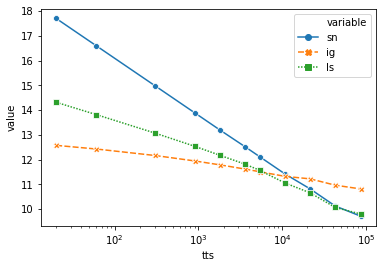

In [46]:

long = compute_stats(tn.DynGraphSN.graph_socioPatterns_Primary_School())
ax = sns.lineplot(x="tts",y="value",data=long,hue="variable",markers=True,style="variable")
#ax = g.ax_joint
ax.set_xscale('log')

sn_m:  14.98370619265935 1.584962500721156 2220 3
sn_e:  14.98370619265935 1.584962500721156 3152 3
ls:  14.98370619265935 11.622051819456376 2220 3152
ig:  14.98370619265935 12.17617314910749 2220 2314
- 39928.582635205916 47278.34792534241
-- 95697.49012182342
--- 116646.26147279184
sn_m:  14.98370619265935 2.321928094887362 2220 5
sn_e:  14.98370619265935 2.321928094887362 3793 5
ls:  14.98370619265935 11.889123656294238 2220 3793
ig:  14.98370619265935 12.391780606013166 2220 2687
- 44375.437388178194 56919.72576019465
-- 104753.12829300102
--- 127367.00966976775
sn_m:  14.98370619265935 3.169925001442312 2220 8
sn_e:  14.98370619265935 3.169925001442312 4180 8
ls:  14.98370619265935 12.029287226968245 2220 4180
ig:  14.98370619265935 12.654188473059545 2220 3223
- 51049.187147715296 62777.12093486889
-- 110251.26600030053
--- 142925.02505523778
sn_m:  14.98370619265935 4.087462841250339 2220 13
sn_e:  14.98370619265935 4.087462841250339 4199 13
ls:  14.98370619265935 12.0358300728

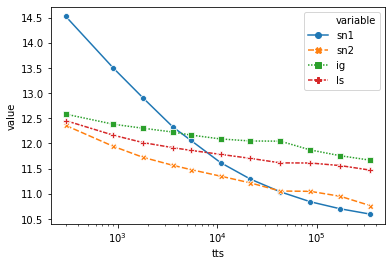

In [47]:
day = 60*60*24
#tts=[day,int(day/2),int(day/4),int(day/8),int(day/16),int(60*60),int(60*30),int(60*15),int(60*5),60,20]
#tts=[day*4,day*2,day,int(day/2),int(day/4),int(day/8),int(day/16),int(60*60),int(60*30),int(60*15),int(60*5),60,20]
tts=[day*4,day*2,day,int(day/2),int(day/4),int(day/8),int(day/16),int(60*60),int(60*30),int(60*15),int(60*5)]



#tts = [int(day)]

long = compute_stats(tn.DynGraphSN.graph_socioPatterns2012(),tts)
ax = sns.lineplot(x="tts",y="value",data=long,hue="variable",markers=True,style="variable")
#ax = g.ax_joint
ax.set_xscale('log')

In [7]:
print(_timesteps())

NameError: name 'ps_tt' is not defined